<a href="https://colab.research.google.com/github/junsookim76/Ewha_2025/blob/main/5_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
!pip install mordred seaborn rdkit
# !pip install rdkit-pypi
!pip install numpy==1.23.5

# 1. Working with SMILES

>**SMILES** ( Simplified Molecular Input Line Entry System )
>
>**Basics**
>
>> `CH3`, `CH2`, `C` : carbon atoms (hydrogens are implicit)
>>
>> `=`  : double bond
>>
>> `()` :  branch
>>
>> `c` : aromatic carbon
>
>
>**Examples**
>
>| Molecule Name | Molecular Formula | Structure       | SMILES      |
>|----------------|--------------------|------------------|-------------|
>| Ethanol        | C₂H₆O              | CH₃–CH₂–OH       | `CCO`       |
>| Acetone        | C₃H₆O              | CH₃–CO–CH₃       | `CC(=O)C`   |
>| Acetic acid    | C₂H₄O₂             | CH₃–COOH         | `CC(=O)O`   |
>| Benzene        | C₆H₆               | Hexagonal ring   | `c1ccccc1`  |

In [118]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG=True

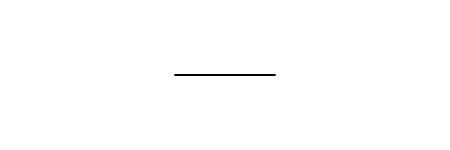

In [119]:
m1 = Chem.MolFromSmiles('CC')

m1

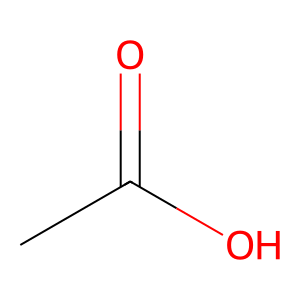

In [120]:
ethanol = Chem.MolFromSmiles('CCO')
acetic_acid = Chem.MolFromSmiles('CC(=O)O')

Draw.MolToImage(ethanol)
Draw.MolToImage(acetic_acid)

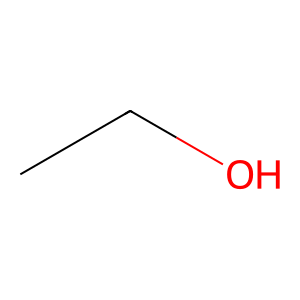

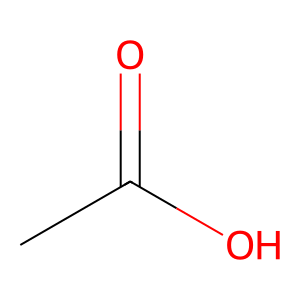

In [121]:
display(Draw.MolToImage(ethanol))
display(Draw.MolToImage(acetic_acid))

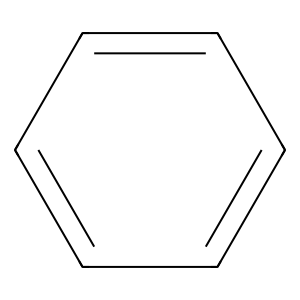

In [122]:
benzene = Chem.MolFromSmiles('c1ccccc1')

Draw.MolToImage(benzene)

#<font color=crimson>Exercise 1</font>
>(a) Acetone의 Smiles를 사용하여 분자구조를 나타내시오.
>
>(b) Phenol의 Smiles를 사용하여 분자구조를 나타내시오.

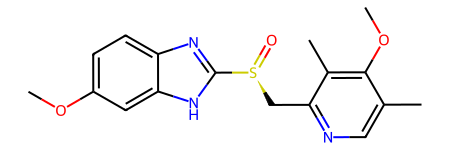

In [123]:
mol = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')

mol

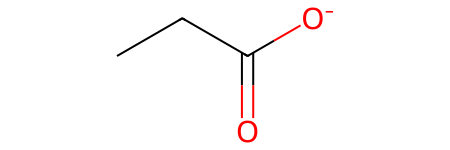

In [124]:
m1 = Chem.MolFromSmiles('CCC(=O)[O-]')

m1

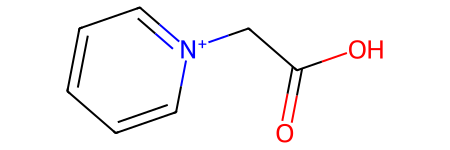

In [125]:
m2 = Chem.MolFromSmiles('c1cccc[n+]1CC(=O)O')

m2

# 2. Working with Chem.rdchem

>**Chem.rdchem** (분자 구조 다루기, 분자 객체, 원자, 결합의 속성 다루기)

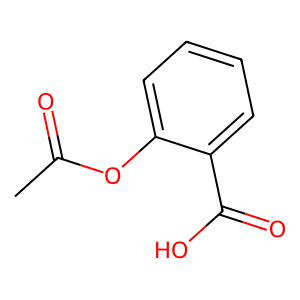

In [126]:
mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')

Draw.MolToImage(mol)

In [127]:
print("원자 수:", mol.GetNumAtoms())
print("결합 수:", mol.GetNumBonds())

원자 수: 13
결합 수: 13


In [128]:
for atom in mol.GetAtoms():
  print(f"원자 번호: {atom.GetIdx()}, 원자 기호: {atom.GetSymbol()}")

원자 번호: 0, 원자 기호: C
원자 번호: 1, 원자 기호: C
원자 번호: 2, 원자 기호: O
원자 번호: 3, 원자 기호: O
원자 번호: 4, 원자 기호: C
원자 번호: 5, 원자 기호: C
원자 번호: 6, 원자 기호: C
원자 번호: 7, 원자 기호: C
원자 번호: 8, 원자 기호: C
원자 번호: 9, 원자 기호: C
원자 번호: 10, 원자 기호: C
원자 번호: 11, 원자 기호: O
원자 번호: 12, 원자 기호: O


In [129]:
for bond in mol.GetBonds():
  print(f"결합 번호: {bond.GetIdx()}, 결합 타입: {bond.GetBondType()}")

결합 번호: 0, 결합 타입: SINGLE
결합 번호: 1, 결합 타입: DOUBLE
결합 번호: 2, 결합 타입: SINGLE
결합 번호: 3, 결합 타입: SINGLE
결합 번호: 4, 결합 타입: AROMATIC
결합 번호: 5, 결합 타입: AROMATIC
결합 번호: 6, 결합 타입: AROMATIC
결합 번호: 7, 결합 타입: AROMATIC
결합 번호: 8, 결합 타입: AROMATIC
결합 번호: 9, 결합 타입: SINGLE
결합 번호: 10, 결합 타입: DOUBLE
결합 번호: 11, 결합 타입: SINGLE
결합 번호: 12, 결합 타입: AROMATIC


# 3. Downloading a Structure Date File (SDF) from PubChem

>#### 1) https://pubchem.ncbi.nlm.nih.gov
>#### 2) Search for a molecule (e.g., "phenol")
>#### 3) Click the "Download" at the top right corner
>#### 4) Select "SDF" as the file format for 2D Structure or 3D Conformer

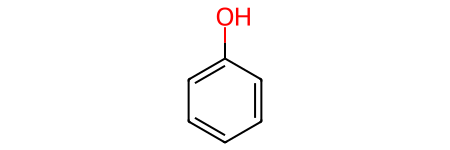

In [130]:
molblock1 = """996
  -OEChem-05202522102D

 13 13  0     0  0  0  0  0  0999 V2000
    2.8660    1.3450    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    0.3450    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.1550    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7321   -0.1550    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -1.1550    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7321   -1.1550    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -1.6550    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631    0.1550    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    0.1550    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631   -1.4650    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690   -1.4650    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -2.2750    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030    1.6550    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1 13  1  0  0  0  0
  2  3  2  0  0  0  0
  2  4  1  0  0  0  0
  3  5  1  0  0  0  0
  3  8  1  0  0  0  0
  4  6  2  0  0  0  0
  4  9  1  0  0  0  0
  5  7  2  0  0  0  0
  5 10  1  0  0  0  0
  6  7  1  0  0  0  0
  6 11  1  0  0  0  0
  7 12  1  0  0  0  0
M  END
"""

phenol = Chem.MolFromMolBlock(molblock1)

phenol

In [131]:
phenol.GetNumConformers()  # 1 conformer

1

In [132]:
phenol.GetConformer().Is3D()

# False = 2D
# True  = 3D

False

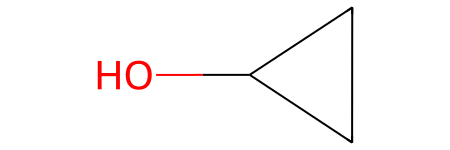

In [133]:
molblock2 ="""123361
  -OEChem-05202522213D

 10 10  0     0  0  0  0  0  0999 V2000
   -1.4948   -0.0001   -0.2381 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2614    0.0012    0.4959 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8788    0.7498   -0.1294 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8773   -0.7509   -0.1284 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3260   -0.0002    1.5775 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5738    1.2540    0.5306 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7077    1.2540   -1.0724 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7054   -1.2559   -1.0708 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5713   -1.2555    0.5323 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0304    0.7775   -0.0063 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1 10  1  0  0  0  0
  2  3  1  0  0  0  0
  2  4  1  0  0  0  0
  2  5  1  0  0  0  0
  3  4  1  0  0  0  0
  3  6  1  0  0  0  0
  3  7  1  0  0  0  0
  4  8  1  0  0  0  0
  4  9  1  0  0  0  0
M  END
"""

cyclopropanol = Chem.MolFromMolBlock(molblock2)

cyclopropanol

In [134]:
phenol.GetNumConformers()  # 1 conformer

1

In [135]:
cyclopropanol.GetConformer().Is3D()

True

In [136]:
print(cyclopropanol.GetNumAtoms())

4


In [137]:
from rdkit.Chem import AllChem

mol3d = Chem.AddHs(cyclopropanol)

AllChem.EmbedMolecule(mol3d) # 대략적인 3D 구조 생성

AllChem.UFFOptimizeMolecule(mol3d) # UFF를 사용하여 구조 최적화

0

In [138]:
mol3d.GetConformer().Is3D()

# True = 3D

True

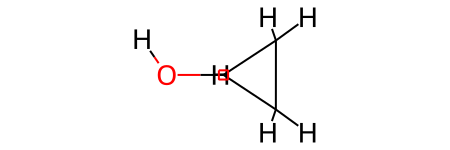

In [139]:
cyclopropanol_h = Chem.MolFromMolBlock(molblock2,removeHs=False)

cyclopropanol_h

In [140]:
!pip install py3Dmol

import py3Dmol

In [141]:
mb1 = Chem.MolToMolBlock(cyclopropanol_h)     # Convert to molblock

# Visualization
view = py3Dmol.view(width=600, height=600)
view.addModel(mb1, 'mol')
view.setStyle({'stick': {}})
view.zoomTo()

view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [142]:
mol3d_cyclopropanol = Chem.AddHs(cyclopropanol)


AllChem.EmbedMolecule(mol3d_cyclopropanol)       # 3D coordinates
AllChem.UFFOptimizeMolecule(mol3d_cyclopropanol) # Energy minimize


mb = Chem.MolToMolBlock(mol3d_cyclopropanol)     # Convert to molblock

# Visualization
view = py3Dmol.view(width=600, height=600)
view.addModel(mb, 'mol')
view.setStyle({'stick': {}})
view.zoomTo()

view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [143]:
mol3d_cyclopropanol_smiles = Chem.AddHs(Chem.MolFromSmiles("C1CC1O"))

AllChem.EmbedMolecule(mol3d_cyclopropanol_smiles)

AllChem.UFFOptimizeMolecule(mol3d_cyclopropanol_smiles)

mb3 = Chem.MolToMolBlock(mol3d_cyclopropanol_smiles)

view = py3Dmol.view(width=600, height=600)
view.addModel(mb3, 'mol')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#<font color=crimson>Exercise 2</font>
>(a) Acetone의 Smiles를 사용하여 3차원 분자구조를 나타내시오.
>
>(b) PubChem에서 3차원 구조 정보를 다운로드하여 Phenol의 3차원 분자구조를 나타내시오.

# 4. Reading PDB data

>#### 1) https://www.rcsb.org
>#### 2) Search for a PDB ID (e.g., "1CRN")
>#### 3) Download Files --> PDB format


In [144]:
!wget https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/1crn.pdb

--2025-05-21 07:07:47--  https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/1crn.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49410 (48K) [text/plain]
Saving to: ‘1crn.pdb.3’

1crn.pdb.3          100%[===================>]  48.25K  --.-KB/s    in 0.01s   

2025-05-21 07:07:47 (4.38 MB/s) - ‘1crn.pdb.3’ saved [49410/49410]



In [145]:
crn = Chem.MolFromPDBFile('1crn.pdb')

crn.GetNumAtoms() # Number of atoms in the protein

327

In [146]:
residues = [atom.GetPDBResidueInfo() for atom in crn.GetAtoms()] #Residue informations in each atom

resinf = [(res.GetResidueNumber(),res.GetResidueName()) for res in residues] # number and name of each residue

print(len(resinf))

print(resinf[:20])

print(resinf[-5:])

327
[(1, 'THR'), (1, 'THR'), (1, 'THR'), (1, 'THR'), (1, 'THR'), (1, 'THR'), (1, 'THR'), (2, 'THR'), (2, 'THR'), (2, 'THR'), (2, 'THR'), (2, 'THR'), (2, 'THR'), (2, 'THR'), (3, 'CYS'), (3, 'CYS'), (3, 'CYS'), (3, 'CYS'), (3, 'CYS'), (3, 'CYS')]
[(46, 'ASN'), (46, 'ASN'), (46, 'ASN'), (46, 'ASN'), (46, 'ASN')]


In [147]:
residues = sorted(set(resinf))

print(residues[:10])

print(len(residues))

[(1, 'THR'), (2, 'THR'), (3, 'CYS'), (4, 'CYS'), (5, 'PRO'), (6, 'SER'), (7, 'ILE'), (8, 'VAL'), (9, 'ALA'), (10, 'ARG')]
46


In [148]:
with open('1crn.pdb') as f:
    pdb_block = f.read()

view = py3Dmol.view(width=600, height=500)
view.addModel(pdb_block, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [149]:
view = py3Dmol.view(width=600, height=500)
view.addModel(pdb_block, 'pdb')
view.setStyle({'cartoon': {}, 'stick': {}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [150]:
view = py3Dmol.view(width=600, height=500)
view.addModel(pdb_block, 'pdb')

view.setStyle({'cartoon': {'color': 'lightgrey'}})


view.setStyle(
    {'resn': 'THR'},  # Highlight THR residues
    {'stick': {'colorscheme': 'greenCarbon'}}
)

view.zoomTo()
view.show()



# The image is save in the current working directory.
with open("protein_view.html", "w") as f:
    f.write(view._make_html())

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# 5. Working with ChEMBL

>**ChEMBL** ( a Manually Curated Database of Bioactive Molecules with Drug-like Properties )
>
>
>

In [151]:
!git clone https://github.com/junsookim76/Ewha_2025.git

fatal: destination path 'Ewha_2025' already exists and is not an empty directory.


In [152]:
import numpy as np
import pandas as pd


In [153]:
mols = []

with open("./Ewha_2025/chembl_mini.smi") as f:
    for line in f:
        data = line.split()
        mol  = Chem.MolFromSmiles(data[0])
        mol.SetProp("chembl_id", data[1])
        mol.SetProp("smiles", data[0])
        mols.append(mol)

In [154]:
data = [{
    "chembl_id": mol.GetProp("chembl_id"),
    "smiles": mol.GetProp("smiles")
} for mol in mols]


df = pd.DataFrame(data)

df.head()

,chembl_id,smiles
0,CHEMBL153534,Cc1cc(-c2csc(N=C(N)N)n2)cn1C
1,CHEMBL503634,COc1c(O)cc(O)c(C(=N)Cc2ccc(O)cc2)c1O
2,CHEMBL503643,CCOC(=O)c1cc2cc(C(=O)O)ccc2[nH]1
3,CHEMBL155287,O=C(NO)c1ccc(I)cc1
4,CHEMBL265174,C=CCc1ccc(OC(=O)C23CC4CC(CC(C4)C2)C3)c(OC)c1


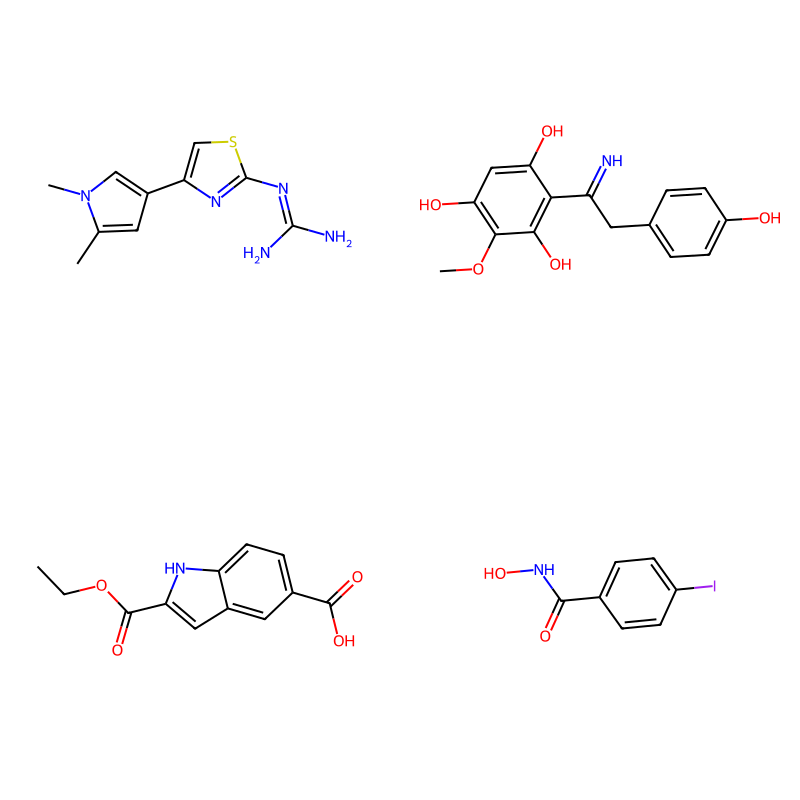

In [156]:
Draw.MolsToGridImage(mols[:4], molsPerRow=2, subImgSize=(400, 400))

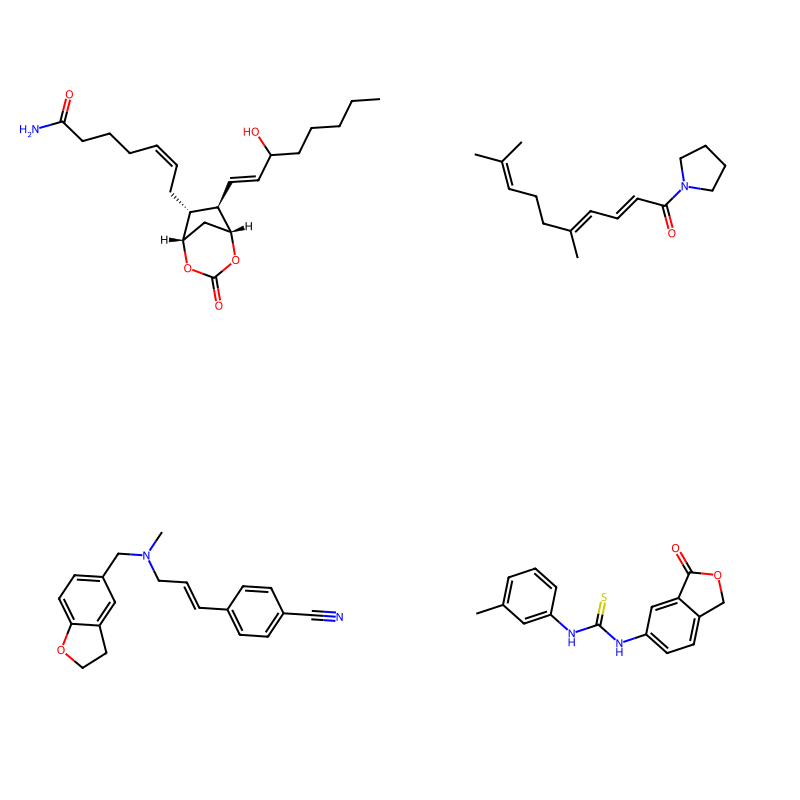

In [157]:
Draw.MolsToGridImage(mols[10:14], molsPerRow=2, subImgSize=(400, 400))

# 6. Calculation of Descriptors using MORDRED

>### Mordred Descriptors
>https://mordred-descriptor.github.io/documentation/master/descriptors.html

| Descriptor            | Description |
|-----------------------|-------------|
| **ABCIndex**          | Atom-Bond Connectivity Index (Topological index reflecting atomic connectivity.) |
| **AcidBase**          | Indicates acidic or basic character of a molecule. |
| **Aromatic**          | Counts aromatic atoms and rings. |
| **AtomCount**         | Counts total and specific atoms in a molecule. |
| **BondCount**         | Counts total, single, double, and triple bonds. |
| **BalabanJ**          | Topological complexity index based on graph distance. |
| **HydrogenBond**      | Estimates number of hydrogen bond donors/acceptors. |
| **Polarizability**    | Measures ease of electron cloud distortion. |
| **WalkCount**         | Counts walks of certain lengths in molecular graph. |
| **Weight**            | Calculates molecular weight and related metrics. |
| **TopologicalCharge** | Reflects distribution of electronic charge in

In [159]:
from mordred import Calculator, descriptors

In [160]:
calc=Calculator(descriptors.ABCIndex)

#register : calc에 계산할 descriptor 종류 추가
calc.register(descriptors.AcidBase)
calc.register(descriptors.Aromatic)
calc.register(descriptors.AtomCount)
calc.register(descriptors.BondCount)
calc.register(descriptors.BalabanJ)
calc.register(descriptors.HydrogenBond)
calc.register(descriptors.Polarizability)
calc.register(descriptors.WalkCount)
calc.register(descriptors.Weight)
calc.register(descriptors.TopologicalCharge)

len(calc.descriptors)

81

In [169]:
# calc = Calculator(descriptors, ignore_3D=True)

# len(calc.descriptors)

In [161]:
# 결과 저장
mordred=calc.pandas(mols)

100%|██████████| 5000/5000 [01:04<00:00, 77.24it/s] 


(5000, 81)


In [162]:
mordred

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10
0,12.377494,11.320978,0,3,10,10,29,16,0,0,...,0.074074,0.066520,0.048235,0.025481,0.032993,0.012915,0.026878,0.000000,0.000000,0.551803
1,15.901098,13.784340,0,0,12,12,36,21,0,0,...,0.093190,0.068015,0.048315,0.037879,0.018442,0.014853,0.016683,0.008563,0.017524,0.550736
2,12.934771,11.320765,1,0,9,10,28,17,0,0,...,0.088889,0.051215,0.050917,0.030174,0.027647,0.020727,0.011519,0.013333,0.000000,0.516643
3,7.956514,7.521784,0,0,6,6,17,11,0,0,...,0.111111,0.038462,0.047778,0.052778,0.026939,0.000000,0.000000,0.000000,0.000000,0.504340
4,19.099223,14.826865,0,0,6,6,50,24,0,4,...,0.061111,0.046875,0.045657,0.031713,0.011398,0.015224,0.011074,0.009777,0.006870,0.498958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14.170645,11.348074,0,0,11,11,30,18,0,0,...,0.082305,0.021991,0.022722,0.029965,0.028976,0.007653,0.005393,0.008662,0.009437,0.367104
4996,16.484101,15.059143,0,0,11,11,44,21,0,0,...,0.101587,0.071128,0.049706,0.055556,0.016296,0.031308,0.000000,0.000000,0.000000,0.689217
4997,19.396191,15.700007,0,0,18,18,45,25,0,0,...,0.087719,0.051829,0.042339,0.034127,0.019784,0.013125,0.013192,0.008047,0.006806,0.462153
4998,20.034348,15.784135,0,0,18,18,43,26,0,0,...,0.085470,0.041667,0.045497,0.035119,0.019712,0.014509,0.014823,0.006424,0.005669,0.465318


In [185]:
mordred['AMW']

,AMW
0,8.106523
1,8.030417
2,8.323886
3,15.467313
4,6.523764
...,...
4995,8.003370
4996,6.935368
4997,7.824740
4998,8.444021


# 7. Correlation between Descriptors

In [171]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

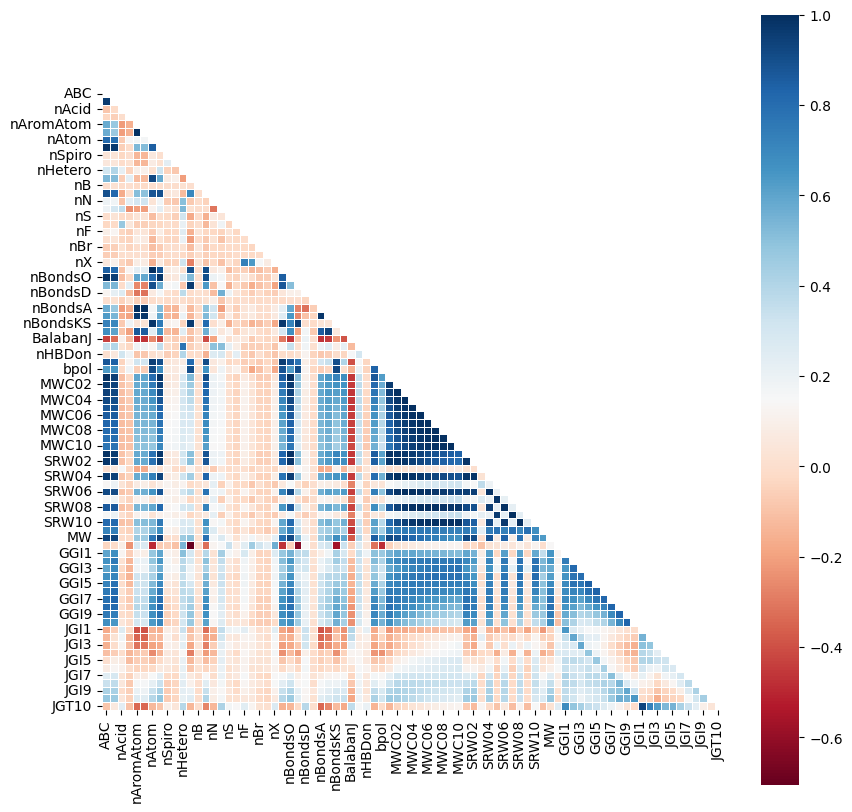

In [173]:
# Correlation matrix between descriptors
correlation=mordred.corr()


mask=np.triu(np.ones_like(correlation, dtype=bool))

# Set the figure size for the heatmap
f,ax=plt.subplots(figsize=(10, 10))

sns.heatmap(
    correlation,
    mask   = mask,     # mask = upper triangle
    cmap   = "RdBu",   #color - red for negative, blue for positive correlation
    square = True,   # each cell square-shaped
    linewidths = 0.5,
)

In [181]:
# Removes the diagonal (self-correlation values of 1.00)
corr_unstacked = correlation.where(~np.eye(correlation.shape[0], dtype=bool))
# np.eye : create an identity matrix
# ~np.eye : diagnal = False & others = True

# Remove the lower triangle
# Extract positive correlation values from the upper triangle


corr_pairs = corr_unstacked.where(
    (np.triu(np.ones(correlation.shape), k=1).astype(bool)) & (corr_unstacked > 0)
)
# np.triu : create a boolean mask for the upper triangle, excluding the diagonal


sorted_corr        = corr_pairs.stack().sort_values(ascending=False)


top5_positive_corr = sorted_corr.head(5)


print(top5_positive_corr)

nAromBond  nBondsA    1.000000
nBondsO    MWC01      1.000000
MWC09      MWC10      0.999342
MWC02      SRW04      0.999158
MWC08      MWC09      0.999122
dtype: float64


In [182]:
main_descriptors = list(set([i for pair in top5_positive_corr.index for i in pair]))

print(main_descriptors)

['nBondsO', 'MWC08', 'MWC01', 'MWC09', 'nAromBond', 'MWC02', 'SRW04', 'nBondsA', 'MWC10']


<Axes: >

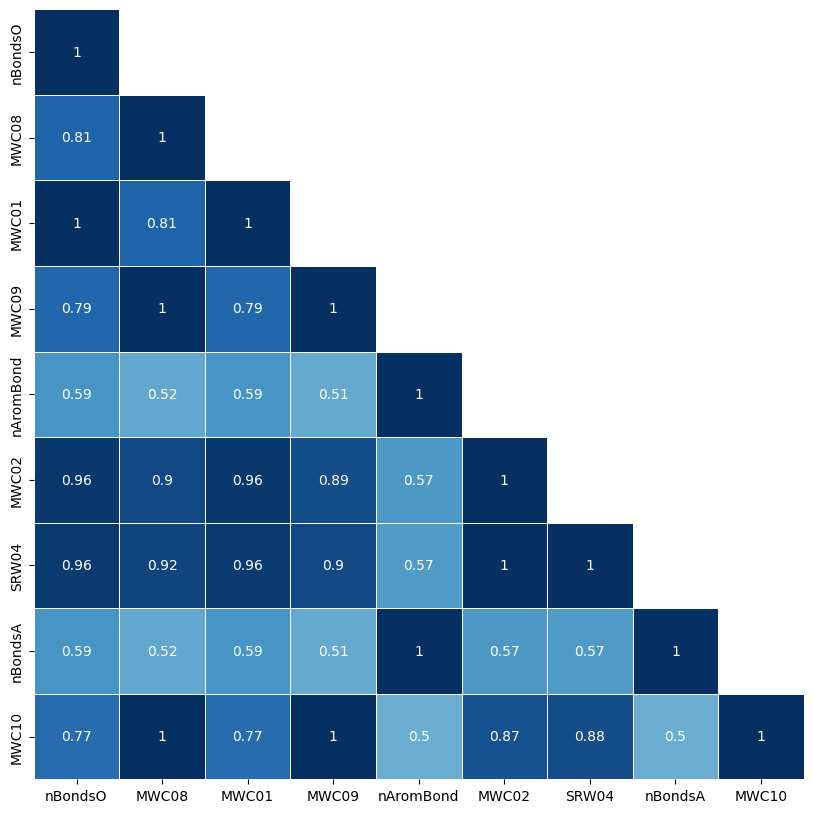

In [183]:
top_corr_matrix  = correlation.loc[main_descriptors, main_descriptors]


mask             = np.triu(np.ones_like(top_corr_matrix, dtype=bool), k=1)


plt.figure(figsize=(10, 10))
sns.heatmap(
    top_corr_matrix,
    mask  = mask,
    annot = True,
    cmap  = "RdBu",
    vmin  = -1,
    vmax  = 1,
    square     = True,
    linewidths = 0.5,
    cbar       = False
)


In [ ]:
corr = mordred[['ABC', 'apol']].corr().iloc[0, 1]

print(f"Correlation between ABC and apol: {corr:.3f}")

Correlation between ABC and apol: 0.875


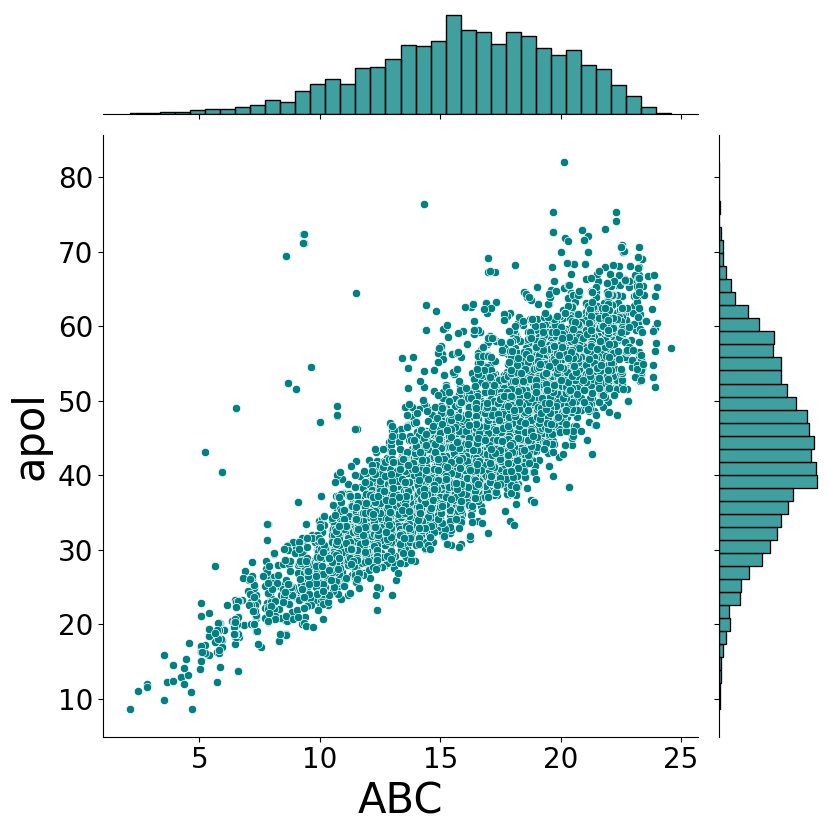

In [ ]:
joint1 = sns.jointplot(
         x    = 'ABC',
         y    = 'apol',
         data = mordred,
         height = 8,           # figure size
         ratio  = 5,            # ratio of main plot to marginal plots(histogram)
         color  = 'teal'
)

joint1.ax_joint.tick_params(labelsize=20)

joint1.set_axis_labels("ABC", "apol", fontsize=30)

In [186]:
corr = mordred[['ABC', 'JGI9']].corr().iloc[0, 1]

print(f"Correlation between ABC and apol: {corr:.3f}")

Correlation between ABC and apol: 0.417


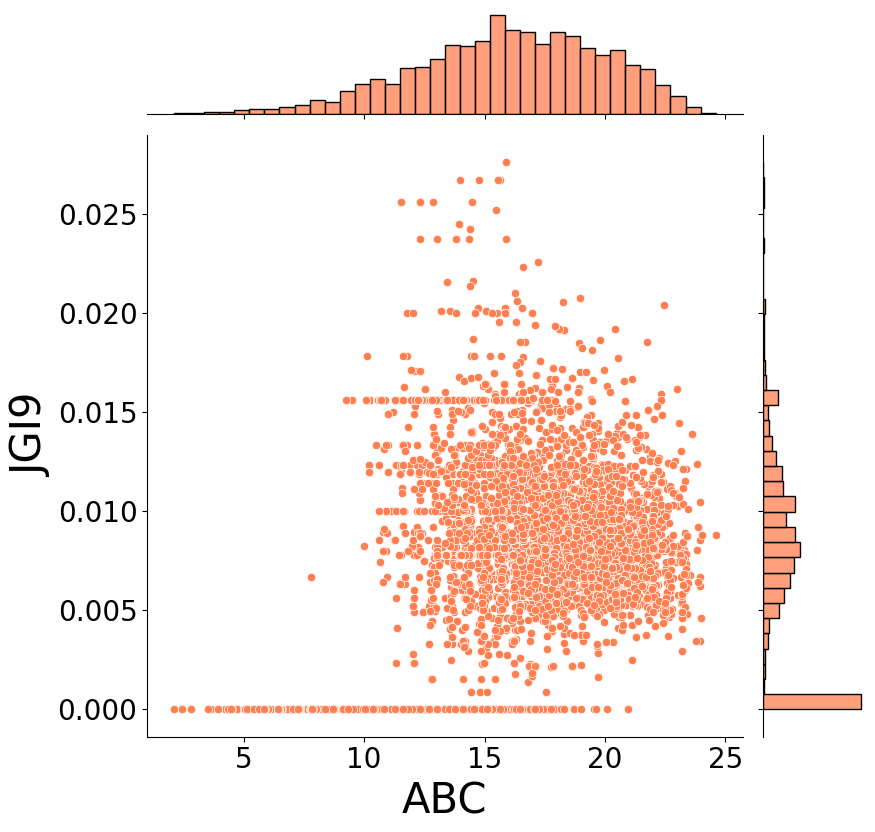

In [ ]:
joint2 = sns.jointplot(
         x     = 'ABC',
         y     = 'JGI9',
         data  = mordred,
         height = 8,
         ratio  = 5,
         color  = 'coral'
)

joint2.ax_joint.tick_params(labelsize=20)

joint2.set_axis_labels("ABC", "JGI9", fontsize=30)

# <font color=crimson>**8. PCA (Principal Component Analysis)**</font>

> Dimensionality reduction
>
>> Reducing many features into fewer, more meaningful components
>
> Preserving data variance
>
>> Retaining as much original variance as possible
>
> Uncorrelated principal components
>
>> Creating new, independent axes containing data structure
>
>
>
>PC1 : a₁·X₁ + a₂·X₂ + ... + aₙ·Xₙ -> linear combination of multiple descriptors
>
>PC2 : b₁·X₁ + b₂·X₂ + ... + bₙ·Xₙ -> direction orthogonal to PC1 that captures high variance

In [187]:
X = mordred.drop(columns=['MW', 'AMW'], errors='ignore')  # Remove target columns
# Including target columns can distort variance and lead to misleading results


In [188]:
X = X.dropna(axis=1) # Drop columns with missing values


In [189]:
from sklearn.preprocessing import StandardScaler

# standardization
X_scaled = StandardScaler().fit_transform(X)


In [190]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 principal components

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

In [193]:
print(X_pca.shape)

(5000, 2)


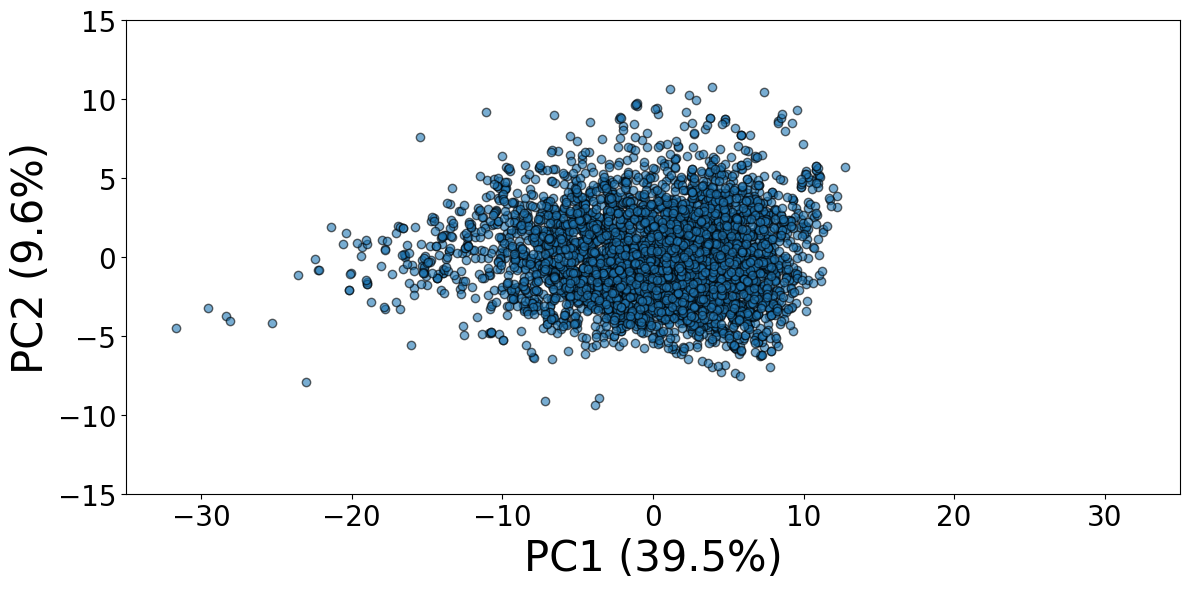

In [194]:
plt.figure(figsize=(12,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolor='k')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=30)

plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=30)

plt.tick_params(labelsize=20)


plt.xlim(-35, 35)
plt.ylim(-15, 15)
plt.tight_layout()

plt.show()

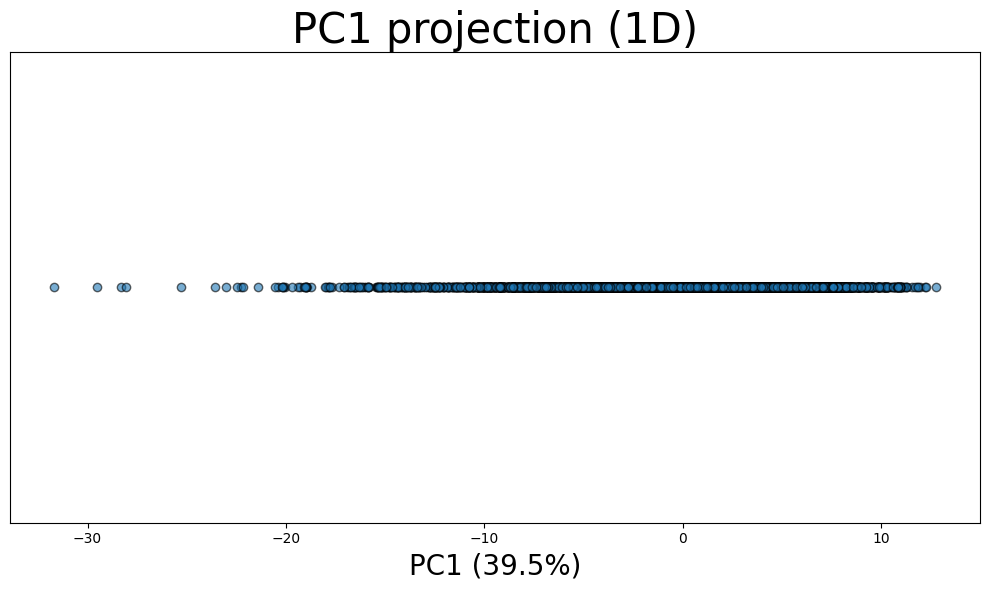

In [195]:
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], [0]*len(X_pca), alpha=0.6, edgecolor='k')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=20)

plt.yticks([])

plt.title("PC1 projection (1D)", fontsize=30)

plt.tight_layout()
plt.show()

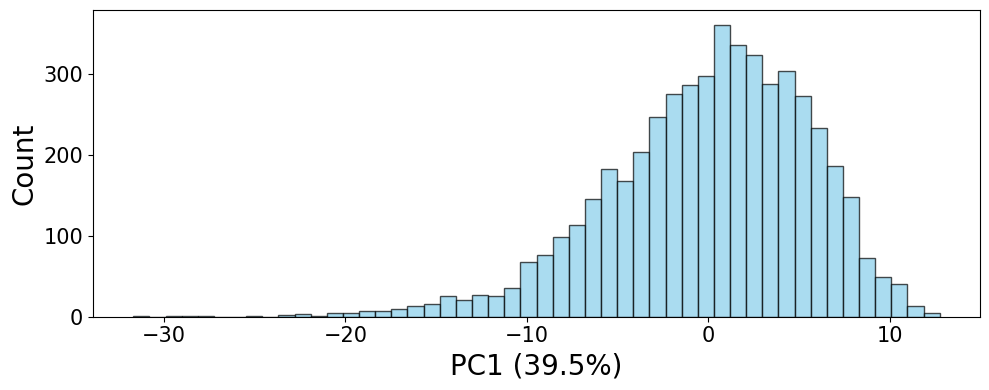

In [196]:
plt.figure(figsize=(10, 4))

plt.hist(X_pca[:, 0], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=20)

plt.ylabel("Count", fontsize=20)

plt.tick_params(labelsize=15)

plt.tight_layout()

plt.show()

- PC1 (39.5 %)

The pricipal axis that summarizes the largest variation among all descriptors

approximately 40% of the total data variance

- PC2 (9.6%)

The second most important axis following PC1


In [199]:
#Feature contribution to PC1, PC2

loadings = pd.DataFrame(pca.components_.T,
                        index=X.columns,
                        columns=['PC1', 'PC2'])

loadings.abs().sort_values('PC1', ascending=False).head(10)


,PC1,PC2
TMWC10,0.177262,0.035930
SRW04,0.176467,0.014707
MWC02,0.176357,0.023304
MWC03,0.175563,0.013651
SRW06,0.174310,0.016153
ABC,0.174142,0.050123
MWC04,0.173936,0.006899
SRW02,0.173872,0.055789
MWC01,0.173499,0.065913
nBondsO,0.173499,0.065913


In [200]:
loadings.abs().sort_values('PC2', ascending=False).head(10)


,PC1,PC2
JGT10,0.006399,0.339527
JGI1,0.019214,0.295111
JGI2,0.002470,0.266879
JGI3,0.005741,0.239786
GGI1,0.116519,0.211004
JGI5,0.022508,0.205398
JGI4,0.000298,0.202208
nO,0.038699,0.195790
GGI2,0.135784,0.176488
GGI3,0.126687,0.176042


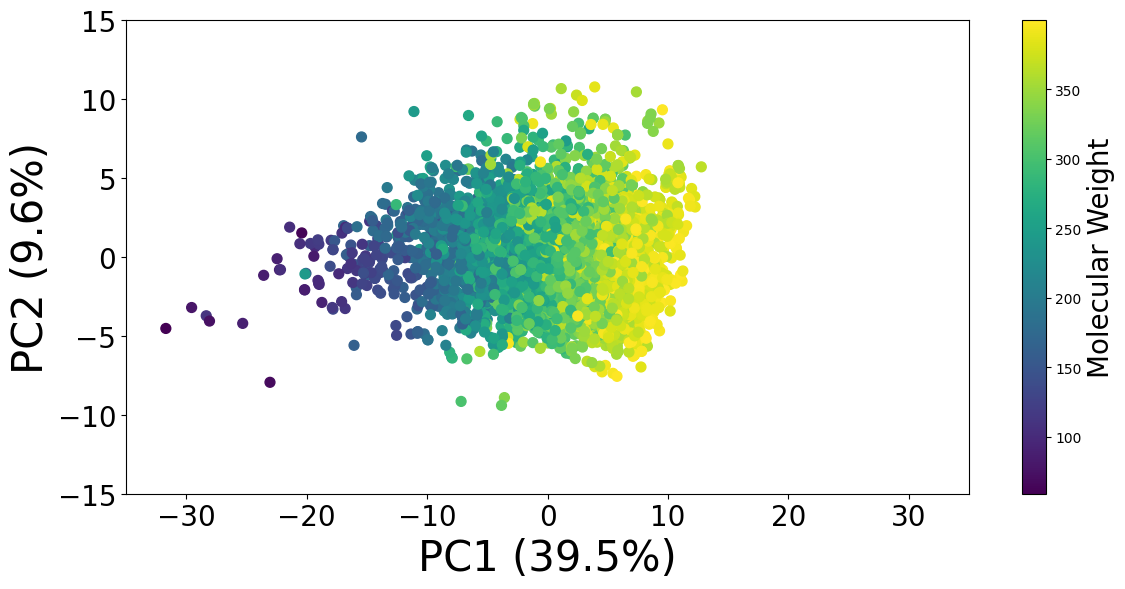

In [201]:
plt.figure(figsize=(12,6))

sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mordred['MW'], cmap='viridis', s=50)

cbar = plt.colorbar(sc)
cbar.set_label('Molecular Weight', fontsize=20)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=30)

plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=30)

plt.tick_params(labelsize=20)


plt.xlim(-35, 35)
plt.ylim(-15, 15)

plt.tight_layout()


1) Positive PC1 - higher molecular weight compounds

2) Negetive PC1 - lower molecular weight compounds

--> PC1 is correlated with molecular weight  

3) PC2 isn't stronly related to molecular weight.

--> no clear correlation along the vertical axis

# <font color=crimson>**9. Structure-based Clustering by Molecular Weight**</font>

> n_clusters = 3 : 3 random centroids
>
> all data points are assigned to the nearest centroid


In [202]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X_pca)

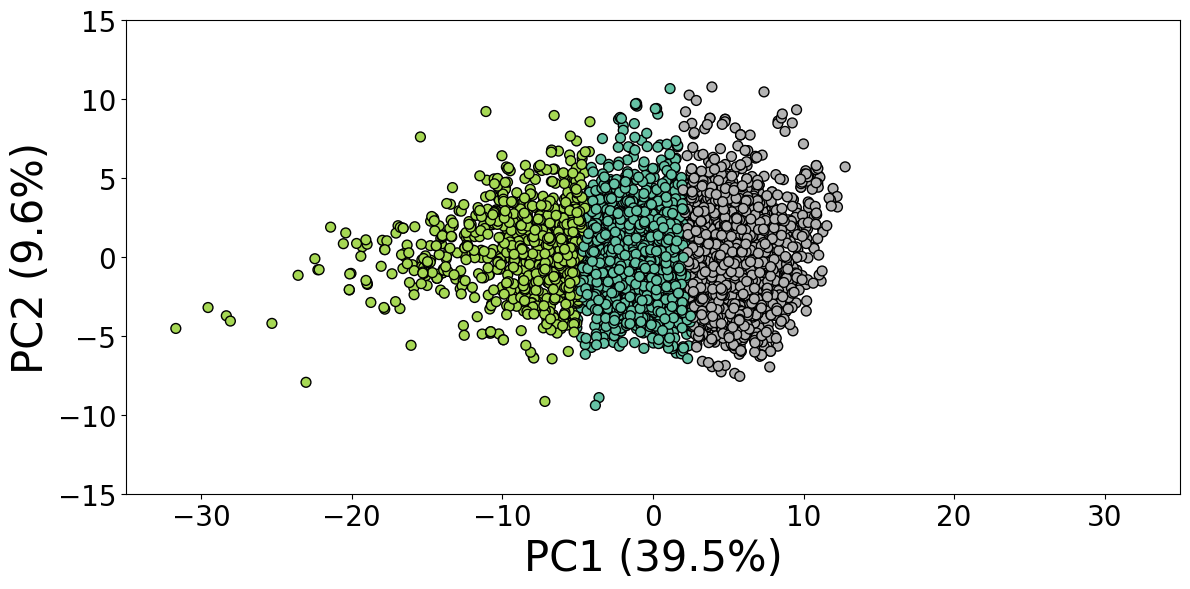

In [203]:
plt.figure(figsize=(12,6))



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2' , s=50, edgecolor='k')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=30)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=30)

plt.tick_params(labelsize=20)

plt.xlim(-35, 35)
plt.ylim(-15, 15)

plt.tight_layout()

plt.show()

# <font color=crimson>**10. Multi-layer perceptron regression**</font>

In [204]:
MLR=make_pipeline(QuantileTransformer(),
                MLPRegressor(hidden_layer_sizes = (100, 50, 100),
                             learning_rate_init = 0.01,
                             max_iter           = 500,
                             early_stopping     = True))

In [205]:
X = mordred.drop(columns=['MW','AMW'])

y = mordred['MW']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

In [207]:
MLR.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(100, 50, 100),
                              learning_rate_init=0.01, max_iter=500))])

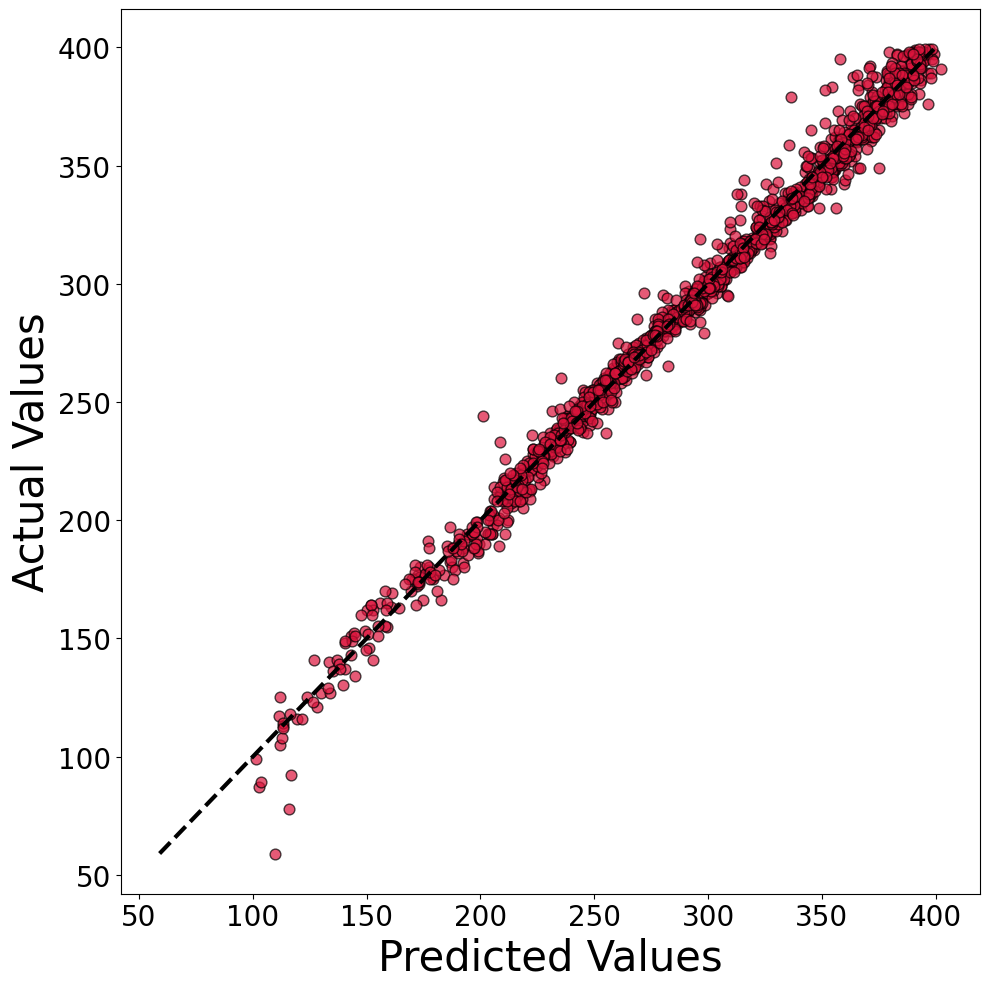

In [208]:
y_pred = MLR.predict(X_test)

plt.figure(figsize=(10, 10))
plt.scatter(y_pred, y_test, color='crimson', edgecolor='black', alpha=0.7, s=60)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', linewidth=3, label='Ideal Prediction')


plt.xlabel("Predicted Values", fontsize=30)
plt.ylabel("Actual Values"   , fontsize=30)

plt.tick_params(labelsize=20)


plt.tight_layout()

plt.show()


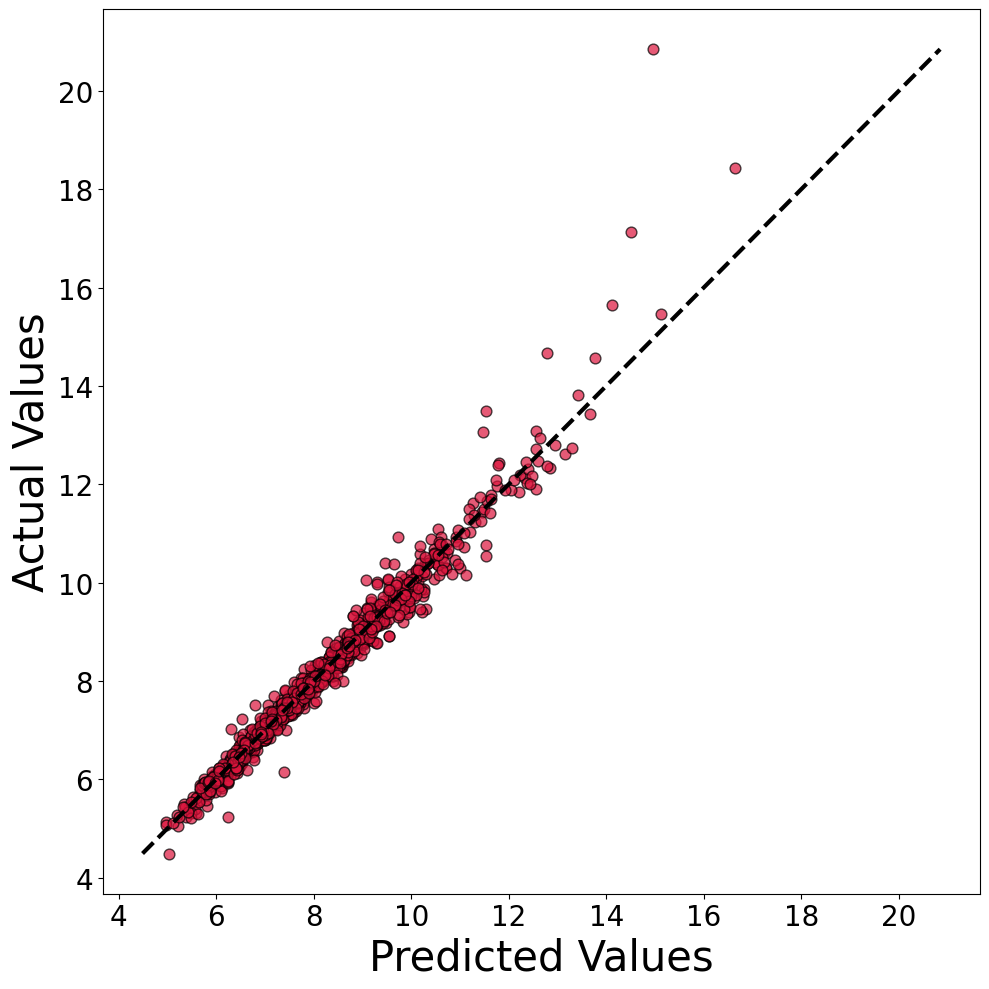

In [209]:
X = mordred.drop(columns=['MW', 'AMW'])
y = mordred['AMW']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)



MLR2 = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(100, 50, 100),
        learning_rate_init=0.01,
        max_iter=500,
        early_stopping=True
    )
)
MLR2.fit(X_train, y_train)

y_pred = MLR2.predict(X_test)


plt.figure(figsize=(10, 10))
plt.scatter(y_pred, y_test, color='crimson', edgecolor='black', alpha=0.7, s=60)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', linewidth=3, label='Ideal Prediction'
)

plt.xlabel("Predicted Values", fontsize=30)
plt.ylabel("Actual Values", fontsize=30)

plt.tick_params(labelsize=20)

plt.tight_layout()

plt.show()

In [211]:
testsets = '''Cc1cccc(/N=N/c2ccc(C(=O)O)cc2)c1	CHEMBL12916
CC1(C)Cc2cc(Cl)cc(Cl)c2C=[N+]1[O-]	CHEMBL12917
O=C(O)CCCCCC(=O)N1CCC2(CCN(c3ccncc3)CC2)C1	CHEMBL13002
CC(C)c1ccc2c(c1)CC[C@H]1[C@@H](CO)[C@@H](O)CC[C@]21C	CHEMBL12668
CC(C)c1ccccc1Sc1c(O)cc(-c2ccc([N+](=O)[O-])cc2)oc1=O	CHEMBL12671
CCCC/C=C(/c1ccc(O)cc1)c1ccc(OCCN(CC)CC)cc1	CHEMBL12959
CC(C)(C)c1ccc(C2OC2c2ccc(C(=O)O)cc2)cc1	CHEMBL12961
O=[N+]([O-])c1ccc(S(=O)(=O)CS(=O)(=O)C(F)(F)F)cc1	CHEMBL12894
CC(C)N(CCC(CCN1CCCCCC1)(C(N)=O)c1ccccc1)C(C)C	CHEMBL12982
Cn1cc(C(=O)c2ccccc2)cc1C=C(C(=O)NO)C(=O)NO	CHEMBL12983
COC(=O)c1ccccc1OCC(O)CNC(C)(C)CNC(N)=O	CHEMBL12984
Cn1cc(C(=O)c2ccccc2)cc1CC(=O)NO	CHEMBL12986
CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3N(C)C)CC1	CHEMBL13004
CC1CCC(NC(=O)N(CCF)N=O)CC1	CHEMBL13005
CNn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCOCC3)cc21	CHEMBL13006
CC(C)(C)c1cc(/C=C/c2nnc(O)o2)cc(C(C)(C)C)c1O	CHEMBL12395
c1ccc2c3c([nH]c2c1)CN(CCc1cnccn1)CC3	CHEMBL12396
'''

In [212]:
testmols=[]

for i in testsets.split():

    if "CHEMBL" not in i:

        mol=Chem.MolFromSmiles(i)

        if mol is not None:

            testmols.append(mol)

In [213]:
testmol_param=calc.pandas(testmols)

100%|██████████| 17/17 [00:00<00:00, 87.55it/s]


In [214]:
testX=testmol_param.drop(columns=['MW','AMW'])

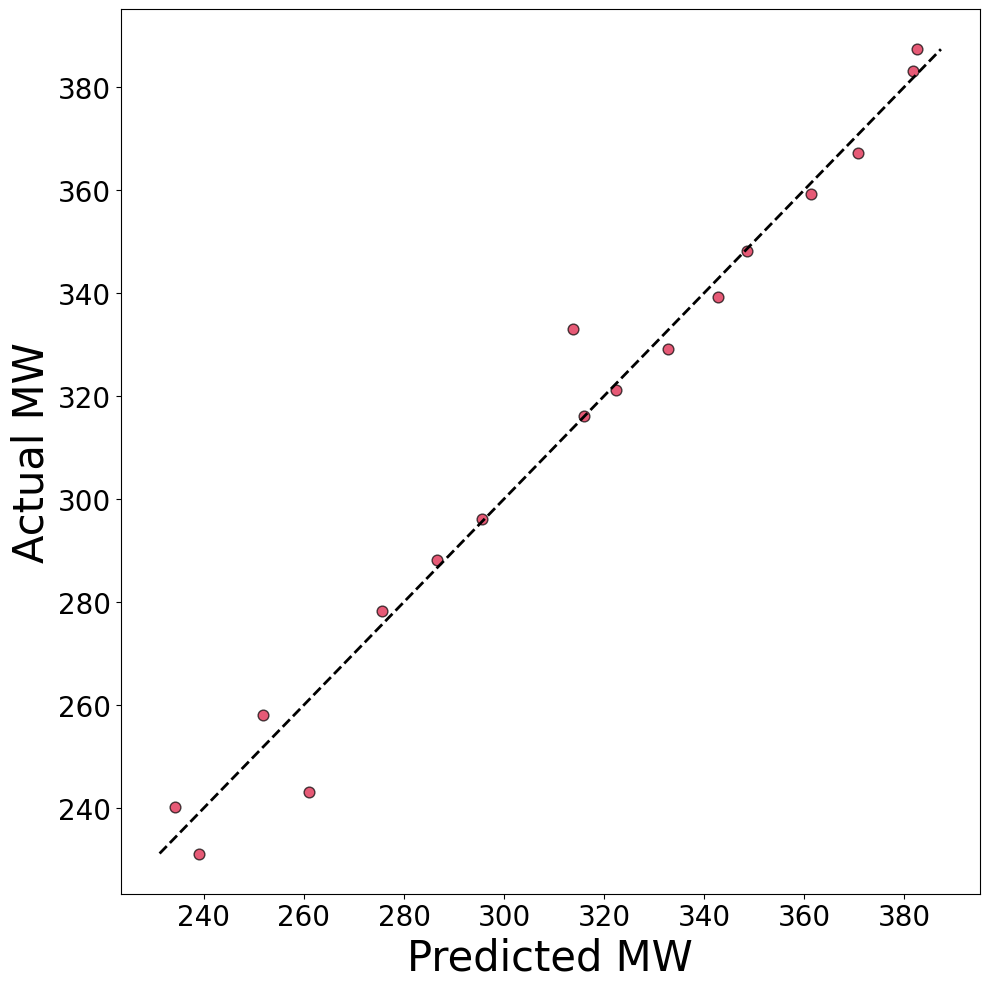

In [215]:
y_pred = MLR.predict(testX)
y_true = testmol_param['MW']

plt.figure(figsize=(10, 10))
plt.scatter(y_pred, y_true, color='crimson', edgecolor='black', alpha=0.7, s=60)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'k--', linewidth=2, label='Ideal Prediction')

plt.xlabel("Predicted MW", fontsize=30)
plt.ylabel("Actual MW", fontsize=30)

plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# <font color=crimson>**11. Multi-output regression**</font>

> Simultaneously predict two continuous molecular properties : MW and AMW
>
> Input nomarlization using QuantileTransformer
>
> MLPRegressor wrapped with MultiOutputRegressor
>
> Extend for multi-target prediction

In [216]:
X = mordred.drop(columns=['MW', 'AMW']) # Remove target columns from input X

y = mordred[['MW', 'AMW']]              # Use MW and AMW as multi-output target


In [217]:
# Split data into train sets 70 / test sets 30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [218]:
# MLPRegressor (Multi-layer Perceptron)

base_model = MLPRegressor(hidden_layer_sizes=(100, 50, 100), # 3 hidden layers
                          learning_rate_init=0.01,           # learning rate
                          max_iter=500,                      # max iteration
                          early_stopping=True)

In [219]:
from sklearn.multioutput import MultiOutputRegressor

# Pipeline: preprocessing + multi-output regression


MLR_multi = make_pipeline(
    QuantileTransformer(),
    MultiOutputRegressor(base_model)
)


In [220]:
# Train the multi-output regression model

MLR_multi.fit(X_train, y_train)


Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('multioutputregressor',
                 MultiOutputRegressor(estimator=MLPRegressor(early_stopping=True,
                                                             hidden_layer_sizes=(100,
                                                                                 50,
                                                                                 100),
                                                             learning_rate_init=0.01,
                                                             max_iter=500)))])

In [221]:
y_pred = MLR_multi.predict(X_test)

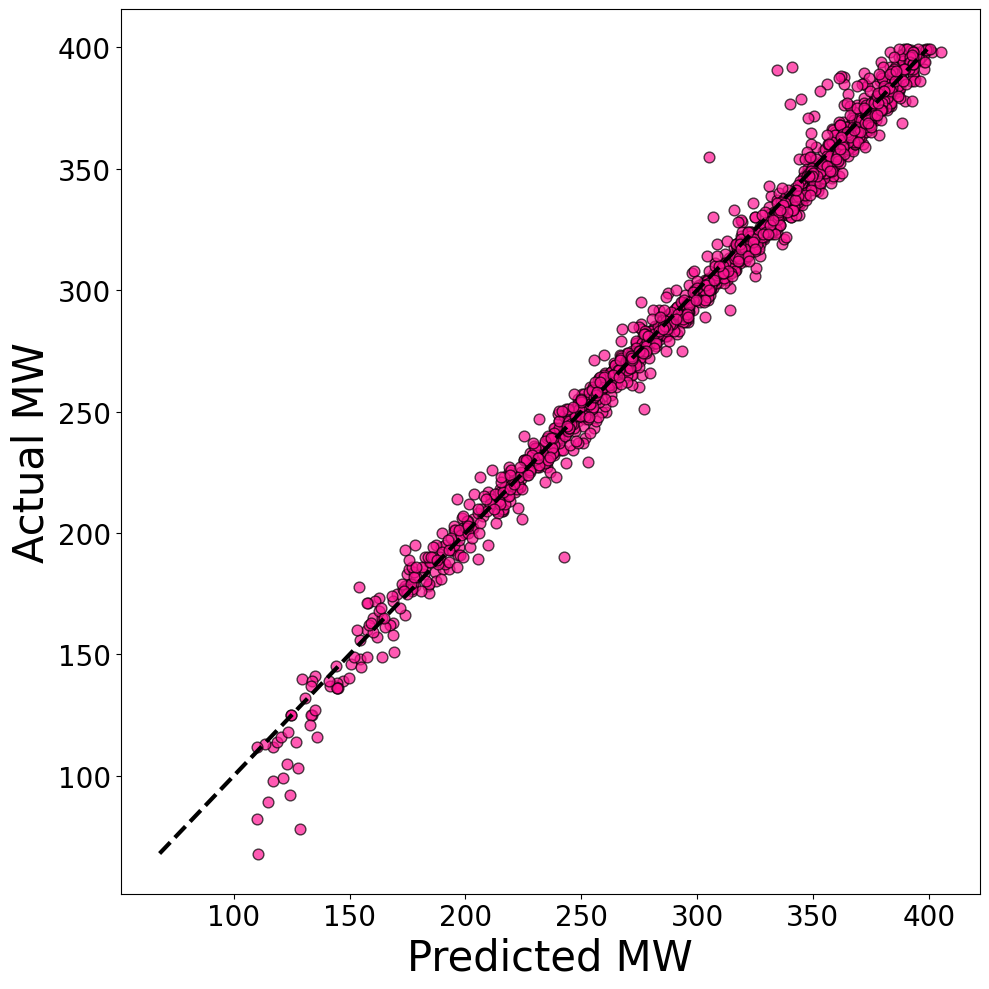

In [222]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred[:, 0], y_test['MW'],
            color='deeppink', edgecolor='black', alpha=0.7, s=60)

plt.plot([y_test['MW'].min(), y_test['MW'].max()],
         [y_test['MW'].min(), y_test['MW'].max()],
         'k--', linewidth=3, label='Ideal Prediction')

plt.xlabel("Predicted MW", fontsize=30)
plt.ylabel("Actual MW", fontsize=30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

- R² : proportion of the variation in the dependent variable that is predictable from the independent variables

The closer to 1, the better.



- RMSE (Root Mean Square Error) : Average size of the prediction error

The closer to 0, the better.

In [223]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test['MW'], y_pred[:, 0])

mse = mean_squared_error(y_test['MW'], y_pred[:, 0])
rmse = np.sqrt(mse)


print(f"\nR² of MW   = {r2:.3f}")
print(f"\nRMSE of MW = {rmse:.2f}")


R² of MW   = 0.988

RMSE of MW = 7.25


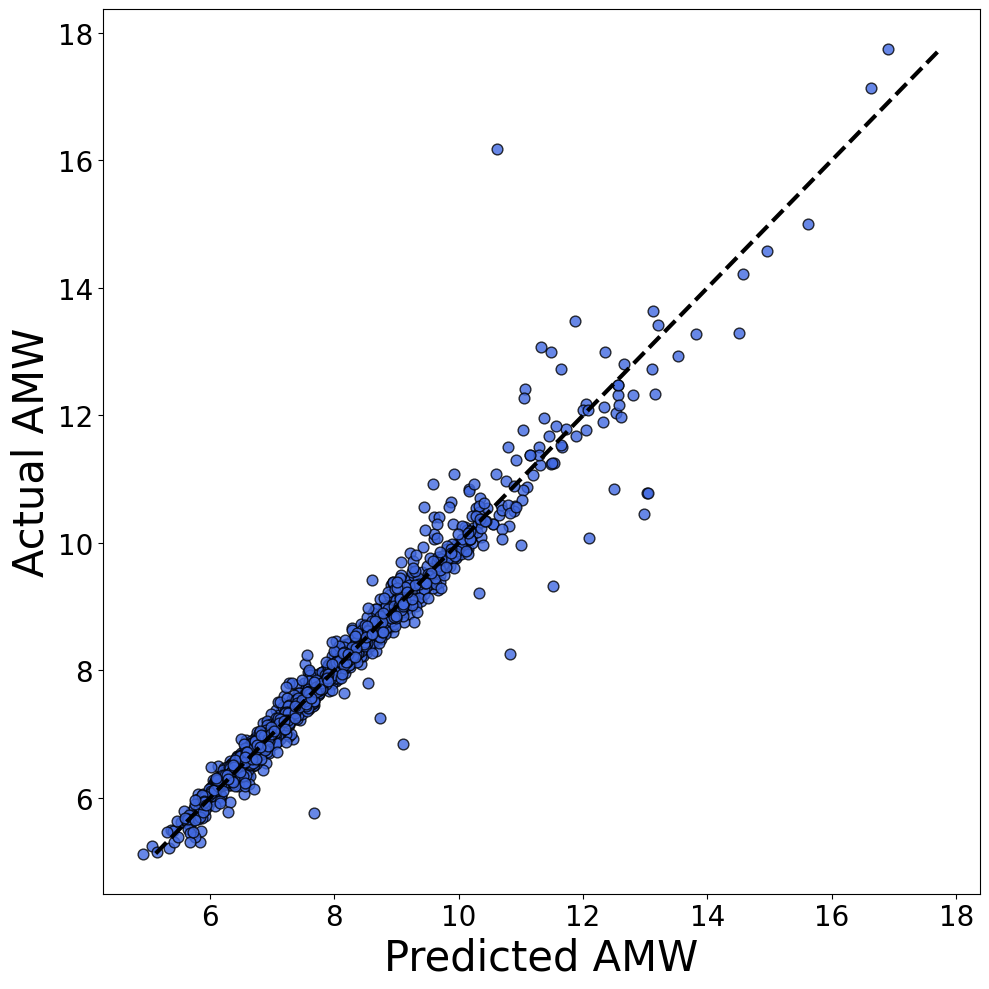

In [224]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred[:, 1], y_test['AMW'],
            color='royalblue', edgecolor='black', alpha=0.8, s=60)

plt.plot([y_test['AMW'].min(), y_test['AMW'].max()],
         [y_test['AMW'].min(), y_test['AMW'].max()],
         'k--', linewidth=3, label='Ideal Prediction')

plt.xlabel("Predicted AMW", fontsize=30)
plt.ylabel("Actual AMW", fontsize=30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

In [225]:
r2_amw = r2_score(y_test['AMW'], y_pred[:, 1])

mse_amw = mean_squared_error(y_test['AMW'], y_pred[:, 1])
rmse_amw = np.sqrt(mse_amw)

print(f"\nR² of AMW = {r2_amw:.3f}")
print(f"\nRMSE of AMW = {rmse_amw:.2f}")


R² of AMW = 0.957

RMSE of AMW = 0.31
